In [1]:
# 1. Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 2. Carregar dataset diretamente do seaborn
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 3. Exploração inicial
print("Formato do dataset:", df.shape)
print("\nColunas disponíveis:", df.columns.tolist())

df.info()
df.describe(include="all")

In [ ]:
# 4. Tratamento de dados faltantes
df.isnull().sum()

# Preencher idade com a mediana
df["age"].fillna(df["age"].median(), inplace=True)

# Preencher porto de embarque com o mais frequente
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Coluna 'deck' tem muitos nulos -> excluir
df.drop(columns=["deck"], inplace=True)

# Verificar novamente
df.isnull().sum()

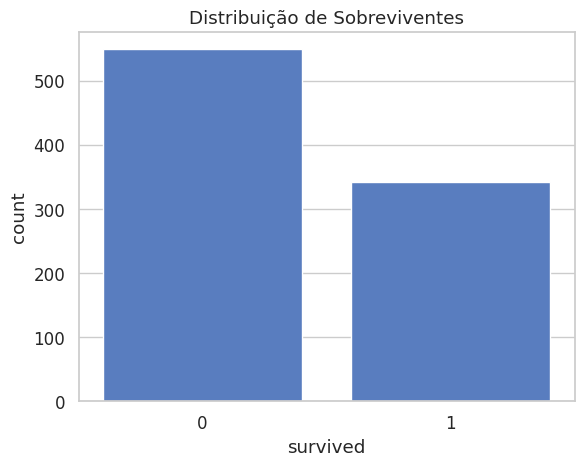

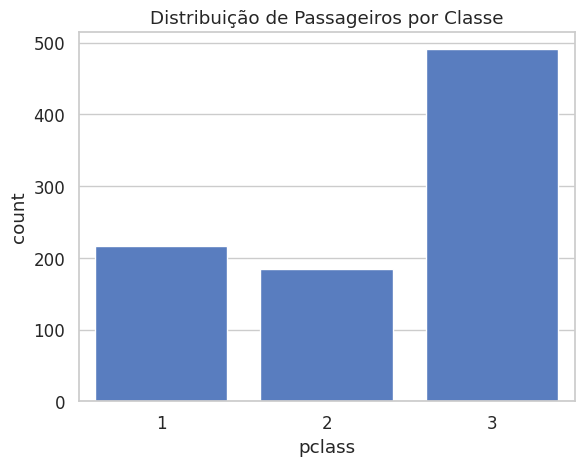

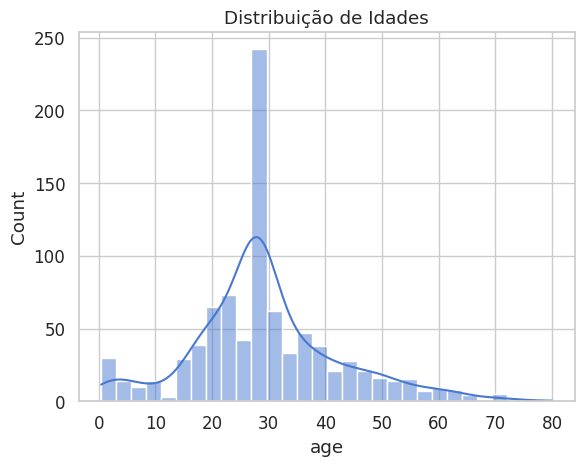

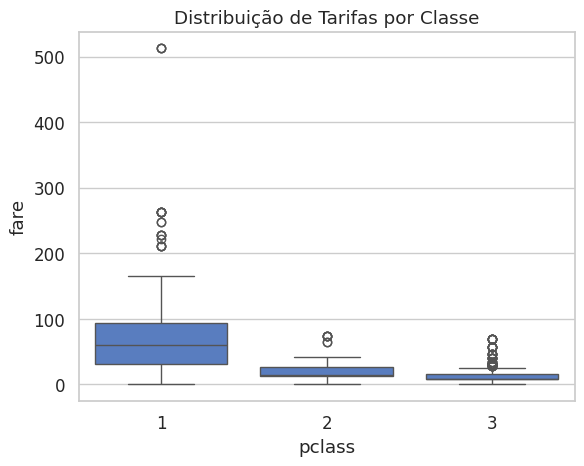

In [4]:
# 5. Análise Univariada

# Sobrevivência
sns.countplot(x="survived", data=df)
plt.title("Distribuição de Sobreviventes")
plt.show()

# Distribuição de classes
sns.countplot(x="pclass", data=df)
plt.title("Distribuição de Passageiros por Classe")
plt.show()

# Idades
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribuição de Idades")
plt.show()

# Tarifa
sns.boxplot(x="pclass", y="fare", data=df)
plt.title("Distribuição de Tarifas por Classe")
plt.show()

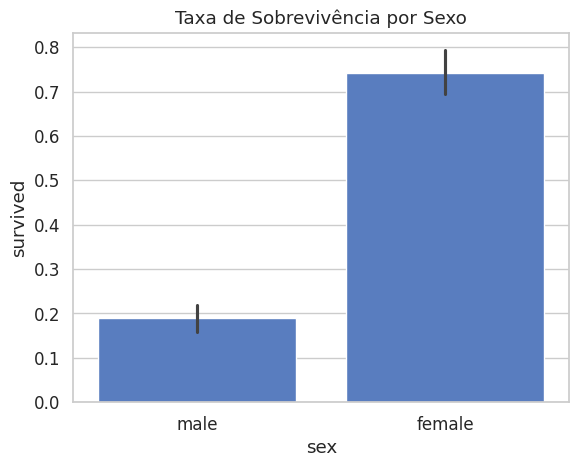

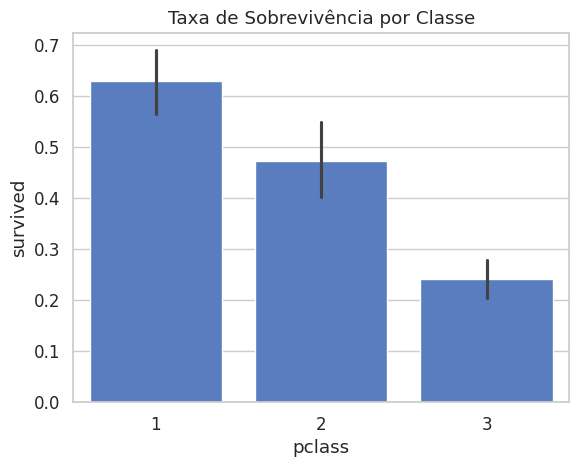

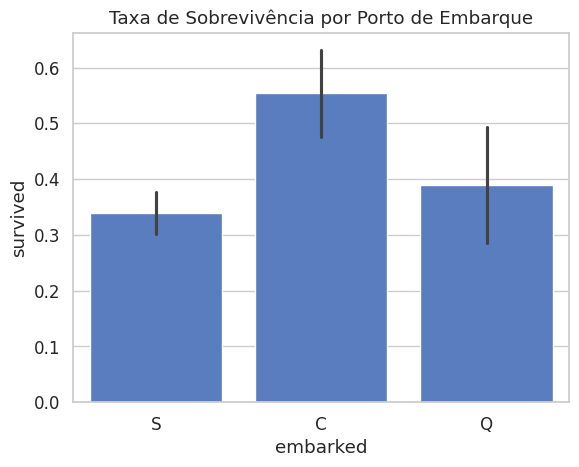

In [5]:
# 6. Análise Bivariada

# Sobrevivência por sexo
sns.barplot(x="sex", y="survived", data=df)
plt.title("Taxa de Sobrevivência por Sexo")
plt.show()

# Sobrevivência por classe
sns.barplot(x="pclass", y="survived", data=df)
plt.title("Taxa de Sobrevivência por Classe")
plt.show()

# Sobrevivência por porto de embarque
sns.barplot(x="embarked", y="survived", data=df)
plt.title("Taxa de Sobrevivência por Porto de Embarque")
plt.show()

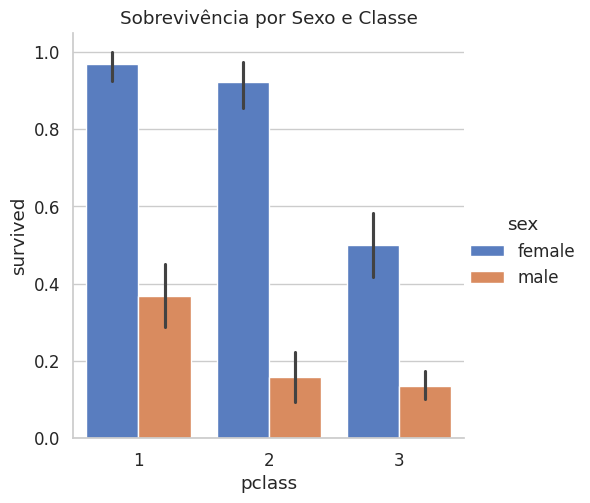

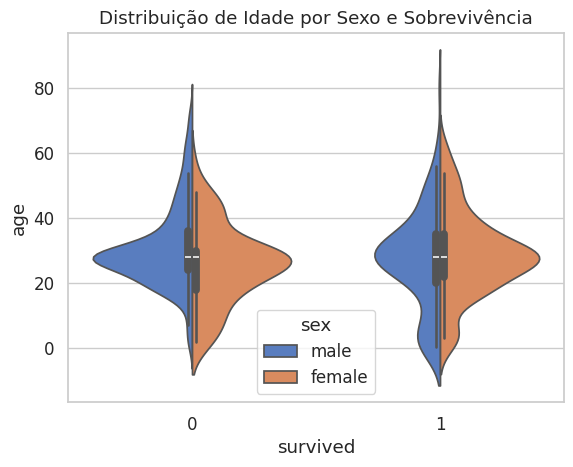

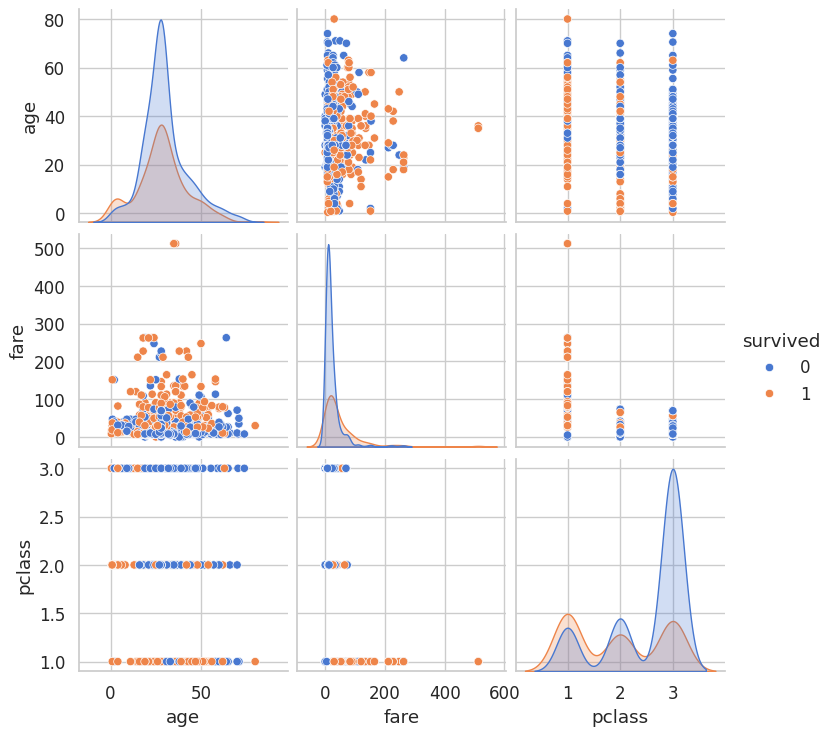

In [6]:
# 7. Análise Multivariada

# Sexo + Classe
sns.catplot(x="pclass", y="survived", hue="sex", kind="bar", data=df)
plt.title("Sobrevivência por Sexo e Classe")
plt.show()

# Idade vs sobrevivência, por sexo
sns.violinplot(x="survived", y="age", hue="sex", data=df, split=True)
plt.title("Distribuição de Idade por Sexo e Sobrevivência")
plt.show()

# Relação múltipla
sns.pairplot(df[["age", "fare", "survived", "pclass"]], hue="survived")
plt.show()